In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.shape

(32560, 15)

In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [7]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


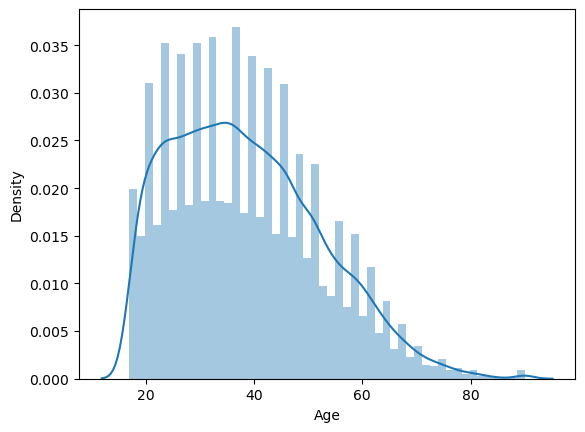

In [9]:
sns.distplot(data['Age'])
plt.show()

The age group earning >50K is high between 20-40. After 40 it has started decreasing which shows that the people tends to earn more with age group between 20 to 40.

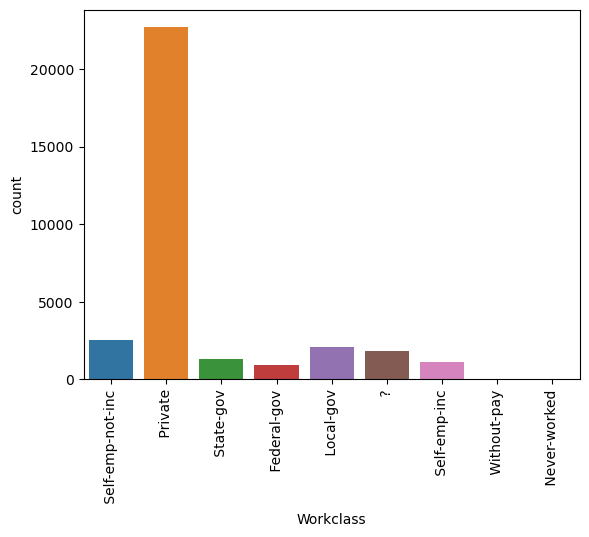

In [10]:
sns.countplot(data['Workclass'])
plt.xticks(rotation=90)
plt.show()

Majority of the people earning >50K belongs to Private sector.

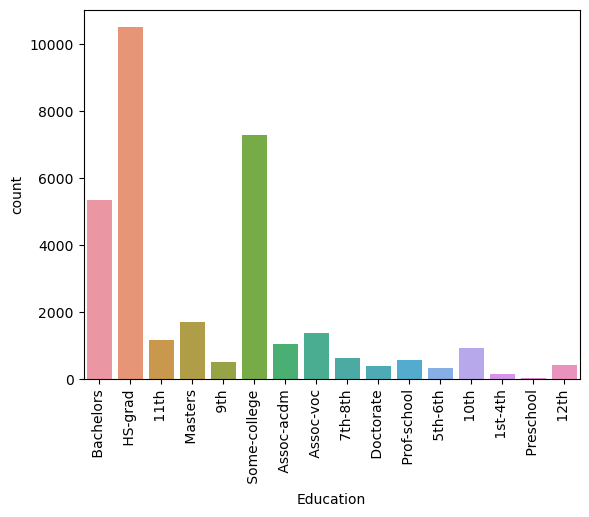

In [11]:
sns.countplot(data['Education'])
plt.xticks(rotation=90)
plt.show()

Majority of the people earning >50K are HS-grad in Education.

In [12]:
data['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

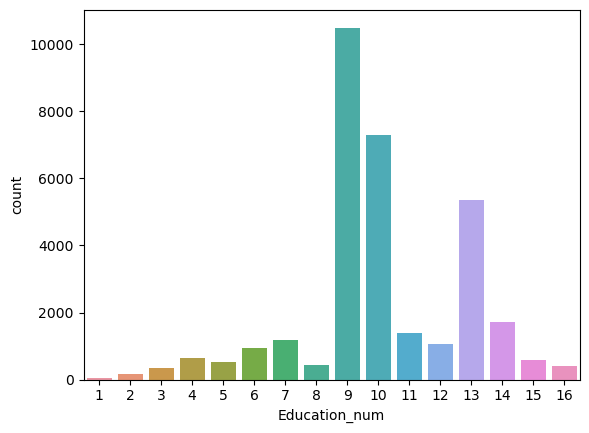

In [13]:
sns.countplot(data['Education_num'])
plt.show()

As seen in the Education column graph above,the same is reflecting in the Education_num graph.HS-grad has the highest number of people i.e., 10501 in value.

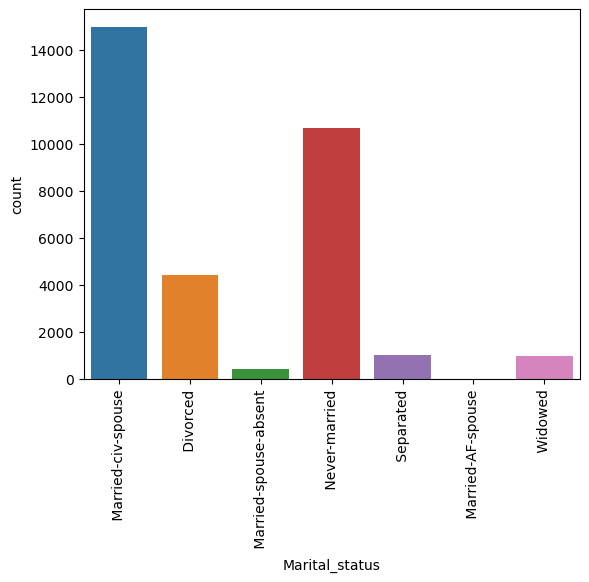

In [14]:
sns.countplot(data['Marital_status'])
plt.xticks(rotation=90)
plt.show()

Marital status of People with Married-civ-spouse are more in numbers.

In [15]:
data['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

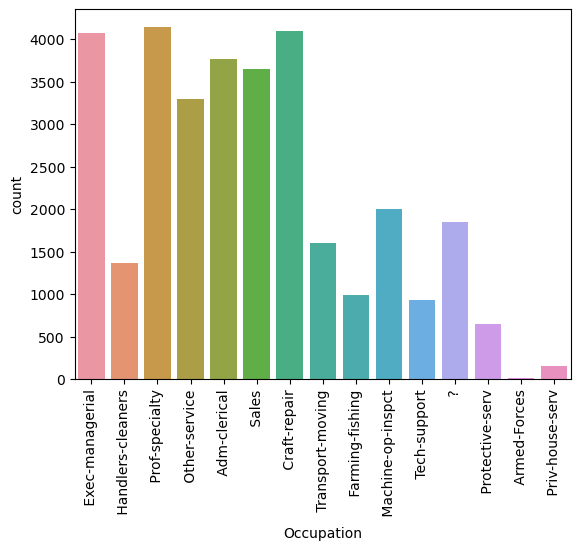

In [16]:
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)
plt.show()

The people with Prof-speciality has the highesh number i.e., 4140. Whereas people with Craft-repair and Exec_managerial as their occupation are also high and close to each other but a little less than Pro_Speciality.
There is also a missing category in this column.

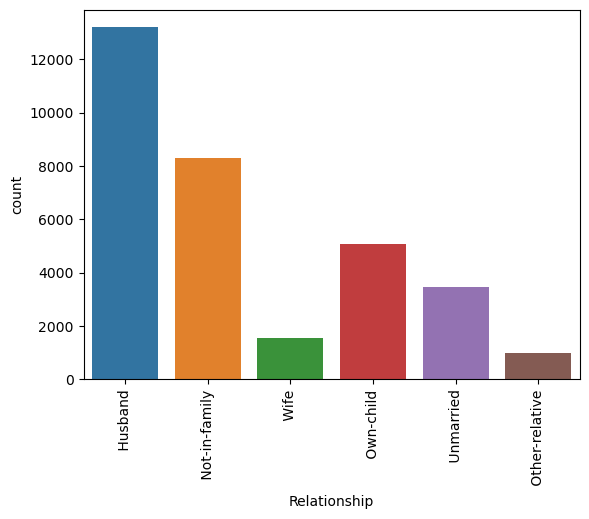

In [17]:
sns.countplot(data['Relationship'])
plt.xticks(rotation=90)
plt.show()

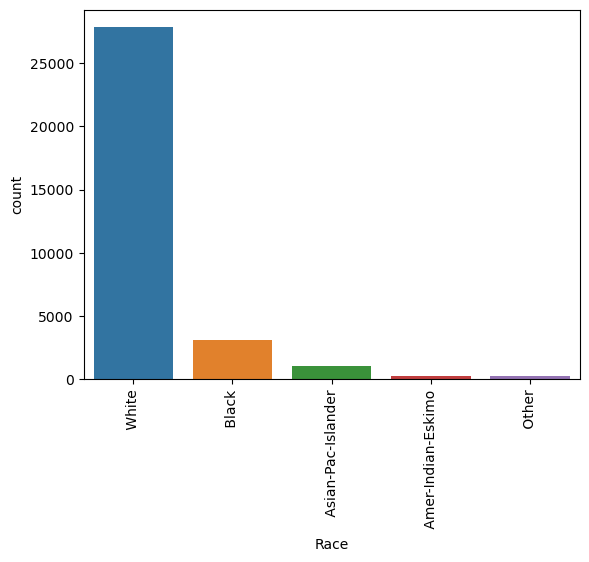

In [18]:
sns.countplot(data['Race'])
plt.xticks(rotation=90)
plt.show()

Highest number of people earning >50K are the whites.

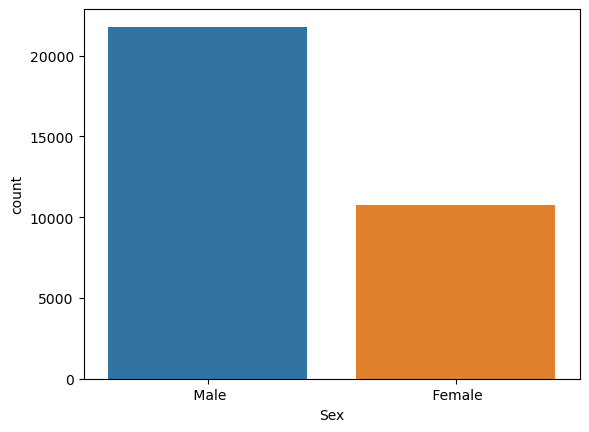

In [19]:
sns.countplot(data['Sex'])
plt.show()

Number of Male members earning >50K is double than the females and can be clearly seen in the above graph.

In [20]:
lab_enc= LabelEncoder()

In [21]:
obj = (data.dtypes=='object')
for col in list(obj[obj].index):
    data[col]= lab_enc.fit_transform(data[col])

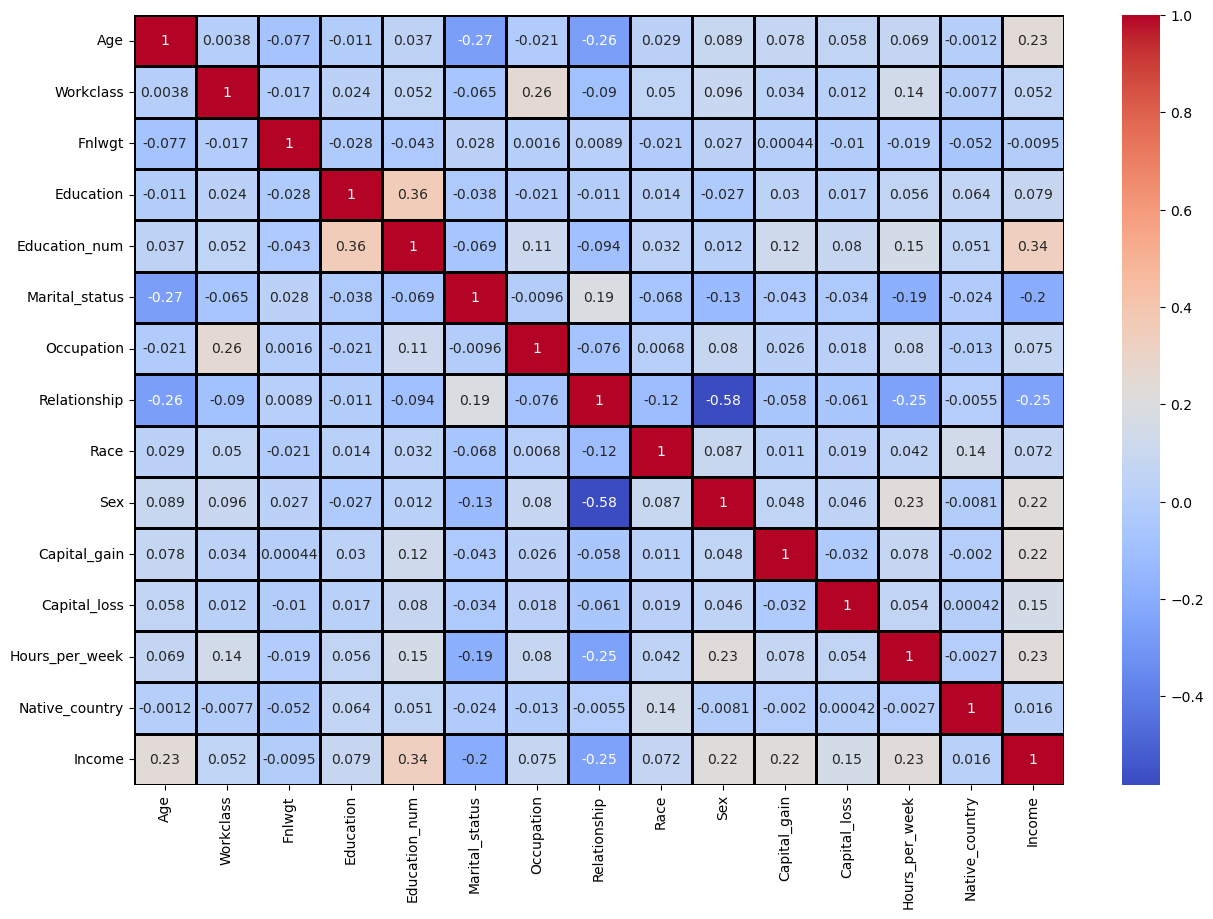

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.show()

From the above heatmap it can be observed that the income has 34% correlation with education num, 23% correlation with Age and Hours per week each.

In [23]:
X_s= data.drop(['Income'],axis=1)
y= data['Income']

In [24]:
scaler= StandardScaler()
X= scaler.fit_transform(X_s)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 100)

In [26]:
dtc= DecisionTreeClassifier()
lr= LogisticRegression()
knn= KNeighborsClassifier()

In [27]:
for cls in (dtc, lr, knn):
    cls.fit(X_train,y_train)
    y_pred= cls.predict(X_test)
    print("\n===Test Result===")
    print("Accuracy Score is ",cls.__class__.__name__,100*accuracy_score(y_test,y_pred))


===Test Result===
Accuracy Score is  DecisionTreeClassifier 80.68181818181817

===Test Result===
Accuracy Score is  LogisticRegression 82.41707616707616

===Test Result===
Accuracy Score is  KNeighborsClassifier 82.90847665847666


The accuracy score with test data using Decision Tree Classifier is 80%, Logistic Regression is 82% whereas by using KNeighbors Classification the accuracy score is 83%.

In [28]:
for cls in (dtc, lr, knn):
    cls.fit(X_train,y_train)
    y_pred= cls.predict(X_train)
    print("\n===Train Result===")
    print("Accuracy Score is ",cls.__class__.__name__,100*accuracy_score(y_train,y_pred))


===Train Result===
Accuracy Score is  DecisionTreeClassifier 99.99616093366093

===Train Result===
Accuracy Score is  LogisticRegression 82.5284090909091

===Train Result===
Accuracy Score is  KNeighborsClassifier 87.97988329238329


The accuracy score of train data using Decision Tree Classifier is approximately 100%, by Logistic Regression it is 82% and by using KNeighbors Classifier it is 88%. 